<a href="https://colab.research.google.com/github/JessyMadhuri/codealpha_tasks/blob/main/pattern_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
import cv2

#Import Dataset

In [4]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
print(x_test.shape,y_test.shape)

(10000, 28, 28) (10000,)


label= 5


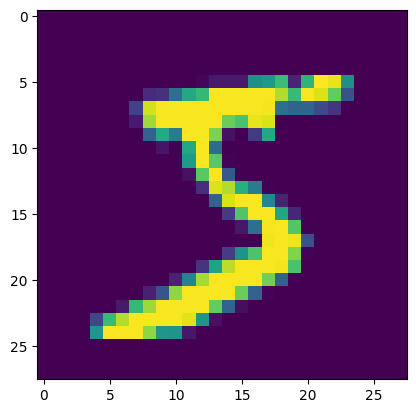

In [7]:
print("label=",y_train[0])
plt.imshow(x_train[0])

#DataPreprocessing

In [11]:
print(x_train.max(),x_train.min(),x_test.max(),x_test.min())

255 0 255 0


In [12]:
x_train_processed,x_test_processed=x_train/255.0,x_test/255.0

In [14]:
print(x_train_processed.max(),x_train_processed.min(),x_test_processed.max(),x_test_processed.min())

1.0 0.0 1.0 0.0


#Build a Classifier using MLP(Multi Layer perceptron)

In [15]:
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D
from keras.layers import Flatten,Dense,Dropout
from keras.optimizers import Adam

In [16]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation='softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Compile the Model

In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#Train and Test the Model

In [19]:
history=model.fit(x_train_processed,y_train,epochs=5)
history

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2966 - accuracy: 0.9142
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1448 - accuracy: 0.9573
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1091 - accuracy: 0.9677
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0872 - accuracy: 0.9728
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0755 - accuracy: 0.9765


#Evaluation

In [20]:
test_loss,test_acc=model.evaluate(x_test_processed,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0744 - accuracy: 0.9761


In [21]:
print("Test Loss:",test_loss)
print("Test Accuracy:",test_acc)

Test Loss: 0.07440762221813202
Test Accuracy: 0.9761000275611877


In [22]:
training_loss=history.history['loss']
training_accuracy=history.history['accuracy']

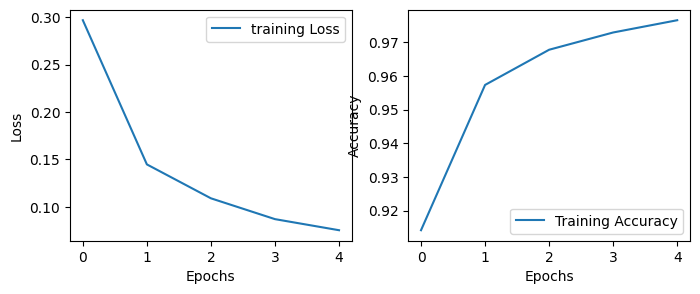

In [23]:
#Create subplots for loss and accuracy
plt.figure(figsize=(8, 3))
#Loss subplot
plt.subplot(1,2,1)
plt.plot(training_loss,label='training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#Accuracy subplot
plt.subplot(1,2,2)
plt.plot(training_accuracy,label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
model.predict(x_test_processed)[0].argmax()

313/313 [==============================] - 1s 2ms/step


7

In [25]:
y_test[0]

7

313/313 [==============================] - 1s 2ms/step


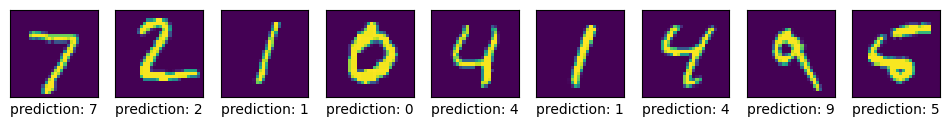

In [26]:
predictions=model.predict(x_test_processed)
plt.figure(figsize=(12,5))
for i in range(9):
  plt.subplot(1,9,i+1)
  prediction=predictions[i].argmax()
  image=plt.imshow(x_test_processed[i])
  plt.xlabel('prediction: '+str(prediction))
  plt.xticks([])#Hide the x-axis scale and ticks
  plt.yticks([])#Hide the y-axis scale and ticks